In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [2]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.]+)",
        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.]+)",
        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.]+)",
        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

file_paths = ['./output/2_4_output_avg.txt', './output/2_8_output_avg.txt', './output/2_16_output_avg.txt',
              './output/4_4_output_avg.txt', './output/4_8_output_avg.txt', './output/4_16_output_avg.txt',
              './output/8_4_output_avg.txt', './output/8_8_output_avg.txt', './output/8_16_output_avg.txt',
              './output/16_4_output_avg.txt', './output/16_8_output_avg.txt', './output/16_16_output_avg.txt',
              './output/32_4_output_avg.txt', './output/32_8_output_avg.txt', './output/32_16_output_avg.txt',
              './output/64_4_output_avg.txt', './output/64_8_output_avg.txt', './output/64_16_output_avg.txt',
              './output/128_4_output_avg.txt', './output/128_8_output_avg.txt', './output/128_16_output_avg.txt']




result_df = consolidate_data_from_files(file_paths)




In [3]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.999105,0.003179,0.991334,0.001627,0.991334,0.000187,0.956479,0.001782,./output/2_4_output_avg.txt
1,2,0.999404,0.001693,0.980597,0.002518,0.980597,0.000242,0.934670,0.002213,./output/2_4_output_avg.txt
2,3,0.995502,0.002891,0.998135,0.002716,0.998135,0.000253,0.966014,0.002402,./output/2_4_output_avg.txt
3,4,0.997913,0.002032,0.801192,0.002595,0.993348,0.000500,0.515520,0.002110,./output/2_4_output_avg.txt
4,5,0.991107,0.001339,0.985425,0.001323,0.985425,0.000206,0.939214,0.001541,./output/2_4_output_avg.txt
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.995095,0.060730,0.809548,0.032490,0.957870,0.000571,0.514492,0.059266,./output/128_16_output_avg.txt
5246,247,0.995460,0.064034,0.803584,0.032890,0.939694,0.000531,0.523499,0.062570,./output/128_16_output_avg.txt
5247,248,0.995157,0.062490,0.799407,0.032457,0.949396,0.000556,0.515089,0.066182,./output/128_16_output_avg.txt
5248,249,0.994509,0.064897,0.805094,0.032451,0.934225,0.000481,0.513392,0.067992,./output/128_16_output_avg.txt


In [4]:
result_df.head(250)

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.999105,0.003179,0.991334,0.001627,0.991334,0.000187,0.956479,0.001782,./output/2_4_output_avg.txt
1,2,0.999404,0.001693,0.980597,0.002518,0.980597,0.000242,0.934670,0.002213,./output/2_4_output_avg.txt
2,3,0.995502,0.002891,0.998135,0.002716,0.998135,0.000253,0.966014,0.002402,./output/2_4_output_avg.txt
3,4,0.997913,0.002032,0.801192,0.002595,0.993348,0.000500,0.515520,0.002110,./output/2_4_output_avg.txt
4,5,0.991107,0.001339,0.985425,0.001323,0.985425,0.000206,0.939214,0.001541,./output/2_4_output_avg.txt
...,...,...,...,...,...,...,...,...,...,...
245,246,0.996863,0.001406,0.983721,0.001432,0.983721,0.000667,0.944701,0.002504,./output/2_4_output_avg.txt
246,247,0.998935,0.001833,0.815490,0.001501,0.975725,0.000177,0.526523,0.001593,./output/2_4_output_avg.txt
247,248,0.999590,0.001493,0.809908,0.002007,0.985459,0.000259,0.512453,0.002097,./output/2_4_output_avg.txt
248,249,0.997421,0.002097,0.800459,0.001766,0.989487,0.000201,0.520911,0.002170,./output/2_4_output_avg.txt


In [5]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [6]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [7]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.999105,0.003179,0.991334,0.001627,0.991334,0.000187,0.956479,0.001782,2_4_Output_Avg
1,2,0.999404,0.001693,0.980597,0.002518,0.980597,0.000242,0.934670,0.002213,2_4_Output_Avg
2,3,0.995502,0.002891,0.998135,0.002716,0.998135,0.000253,0.966014,0.002402,2_4_Output_Avg
3,4,0.997913,0.002032,0.801192,0.002595,0.993348,0.000500,0.515520,0.002110,2_4_Output_Avg
4,5,0.991107,0.001339,0.985425,0.001323,0.985425,0.000206,0.939214,0.001541,2_4_Output_Avg
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.995095,0.060730,0.809548,0.032490,0.957870,0.000571,0.514492,0.059266,128_16_Output_Avg
5246,247,0.995460,0.064034,0.803584,0.032890,0.939694,0.000531,0.523499,0.062570,128_16_Output_Avg
5247,248,0.995157,0.062490,0.799407,0.032457,0.949396,0.000556,0.515089,0.066182,128_16_Output_Avg
5248,249,0.994509,0.064897,0.805094,0.032451,0.934225,0.000481,0.513392,0.067992,128_16_Output_Avg


In [8]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time'} )

In [9]:
result_df

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
0,1,0.999105,0.003179,0.991334,0.001627,0.991334,0.000187,0.956479,0.001782,2_4_Output_Avg
1,2,0.999404,0.001693,0.980597,0.002518,0.980597,0.000242,0.934670,0.002213,2_4_Output_Avg
2,3,0.995502,0.002891,0.998135,0.002716,0.998135,0.000253,0.966014,0.002402,2_4_Output_Avg
3,4,0.997913,0.002032,0.801192,0.002595,0.993348,0.000500,0.515520,0.002110,2_4_Output_Avg
4,5,0.991107,0.001339,0.985425,0.001323,0.985425,0.000206,0.939214,0.001541,2_4_Output_Avg
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.995095,0.060730,0.809548,0.032490,0.957870,0.000571,0.514492,0.059266,128_16_Output_Avg
5246,247,0.995460,0.064034,0.803584,0.032890,0.939694,0.000531,0.523499,0.062570,128_16_Output_Avg
5247,248,0.995157,0.062490,0.799407,0.032457,0.949396,0.000556,0.515089,0.066182,128_16_Output_Avg
5248,249,0.994509,0.064897,0.805094,0.032451,0.934225,0.000481,0.513392,0.067992,128_16_Output_Avg


In [10]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [11]:
print(column_list)

[0.9564793883, 0.9346703699, 0.9660135815, 0.5155197759, 0.9392137312, 0.9290997446, 0.530296197, 0.9108966993, 0.5266179055, 0.5191557466, 0.5305577632, 0.9242964096, 0.9455245153, 0.9285399633, 0.5335047815, 0.5214017711, 0.5178384226, 0.5282915029, 0.537499227, 0.5120768976, 0.9489708499, 0.9325800214, 0.9608627938, 0.9360042886, 0.5175829806, 0.9624345423, 0.5320077192, 0.9434435015, 0.9525327322, 0.5203152695, 0.9220471865, 0.5340325081, 0.5266201444, 0.5254113677, 0.525976515, 0.9201265506, 0.519135891, 0.5169101331, 0.9433102192, 0.9501807083, 0.5247338811, 0.9549405449, 0.9549756135, 0.9249132833, 0.5202790343, 0.5211270022, 0.5227220285, 0.9549000445, 0.9635131745, 0.5537151987, 0.9608810672, 0.5214229811, 0.5449921873, 0.5292399885, 0.9494819977, 0.9483506441, 0.9534622763, 0.5286997979, 0.9444752088, 0.9547358503, 0.9594480067, 0.5192388896, 0.9456714058, 0.965618942, 0.9742060459, 0.9257509732, 0.520177772, 0.9341221971, 0.9243276592, 0.9531318428, 0.9416558143, 0.515300020

In [12]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [15]:
filename = '2_4_Output_Avg'
df_1 = result_df[result_df['File'] == filename]

In [16]:
df_1

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
0,1,0.999105,0.003179,0.991334,0.001627,0.991334,0.000187,0.956479,0.001782,2_4_Output_Avg
1,2,0.999404,0.001693,0.980597,0.002518,0.980597,0.000242,0.934670,0.002213,2_4_Output_Avg
2,3,0.995502,0.002891,0.998135,0.002716,0.998135,0.000253,0.966014,0.002402,2_4_Output_Avg
3,4,0.997913,0.002032,0.801192,0.002595,0.993348,0.000500,0.515520,0.002110,2_4_Output_Avg
4,5,0.991107,0.001339,0.985425,0.001323,0.985425,0.000206,0.939214,0.001541,2_4_Output_Avg
...,...,...,...,...,...,...,...,...,...,...
245,246,0.996863,0.001406,0.983721,0.001432,0.983721,0.000667,0.944701,0.002504,2_4_Output_Avg
246,247,0.998935,0.001833,0.815490,0.001501,0.975725,0.000177,0.526523,0.001593,2_4_Output_Avg
247,248,0.999590,0.001493,0.809908,0.002007,0.985459,0.000259,0.512453,0.002097,2_4_Output_Avg
248,249,0.997421,0.002097,0.800459,0.001766,0.989487,0.000201,0.520911,0.002170,2_4_Output_Avg


In [17]:
pd.set_option('display.max_columns', None)

In [1]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [18]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_499004/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [19]:
specific_group = grouped.get_group('2_8_Output_Avg')
specific_group

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
250,1,0.999599,0.002291,0.902224,0.001889,0.980344,0.000295,0.708319,0.001865,2_8_Output_Avg
251,2,0.999633,0.001769,0.891562,0.001778,0.994175,0.000208,0.702779,0.001933,2_8_Output_Avg
252,3,0.999241,0.001766,0.983354,0.001842,0.983354,0.000255,0.979630,0.002056,2_8_Output_Avg
253,4,0.999825,0.002108,0.904395,0.002736,0.982275,0.000207,0.695324,0.002339,2_8_Output_Avg
254,5,0.998487,0.002057,0.892176,0.001483,0.994242,0.000192,0.694155,0.001635,2_8_Output_Avg
...,...,...,...,...,...,...,...,...,...,...
495,246,0.999153,0.001639,0.894595,0.001448,0.997187,0.000199,0.697927,0.002318,2_8_Output_Avg
496,247,0.999403,0.001580,0.888046,0.001939,0.999659,0.000189,0.685869,0.001618,2_8_Output_Avg
497,248,0.999782,0.001396,0.998847,0.002572,0.998847,0.000194,0.983240,0.002313,2_8_Output_Avg
498,249,0.999096,0.001996,0.984874,0.001678,0.984874,0.000267,0.963867,0.001822,2_8_Output_Avg


In [20]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9989040282323999)

In [21]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_499004/3674146322.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [22]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2_4_Output_Avg,0.997331,0.002458,0.985014,0.999981,0.988021,0.008873,0.953137,0.999947,0.904235,0.091629,0.790568,0.999856,0.748395,0.209692,0.506579,0.977839,0.002057,0.000754,0.001256,0.008091,0.000306,0.000196,0.000176,0.002882,0.002049,0.000543,0.001219,0.005597,0.002291,0.000587,0.001466,0.007526
1,2_8_Output_Avg,0.998904,0.001094,0.993990,0.999988,0.990800,0.006618,0.967822,0.999998,0.944897,0.048131,0.880138,0.999998,0.845986,0.139292,0.680693,0.996394,0.001779,0.000658,0.001144,0.010679,0.000259,0.000088,0.000159,0.000755,0.001806,0.000366,0.001141,0.003666,0.002890,0.013237,0.001266,0.211124
2,2_16_Output_Avg,0.999488,0.000515,0.996405,0.999996,0.993911,0.004949,0.977912,0.999997,0.969501,0.024388,0.937070,0.999868,0.916004,0.073104,0.821028,0.998455,0.001412,0.000849,0.001068,0.012169,0.000272,0.001088,0.000150,0.017372,0.001351,0.000353,0.001055,0.003450,0.001615,0.001117,0.001210,0.017820
3,4_4_Output_Avg,0.996196,0.002378,0.986188,0.999667,0.976759,0.010257,0.945838,0.995445,0.857560,0.074217,0.782717,0.994233,0.637295,0.178867,0.506610,0.968778,0.002180,0.000496,0.001719,0.006567,0.000224,0.000162,0.000154,0.002008,0.002646,0.013640,0.001398,0.217403,0.002444,0.000644,0.001882,0.010204
4,4_8_Output_Avg,0.998323,0.001056,0.994658,0.999847,0.984370,0.007285,0.958336,0.999069,0.920378,0.037491,0.881995,0.999069,0.771026,0.116461,0.676905,0.987763,0.003244,0.013203,0.001669,0.210970,0.000233,0.000080,0.000155,0.000722,0.001963,0.000455,0.001341,0.004469,0.002649,0.000721,0.001841,0.008327
5,4_16_Output_Avg,0.999247,0.000446,0.997695,0.999935,0.988457,0.005162,0.967317,0.998863,0.958671,0.018093,0.937293,0.998863,0.880547,0.059438,0.823278,0.992759,0.002860,0.000486,0.001860,0.005899,0.000281,0.000098,0.000178,0.000803,0.002371,0.000401,0.001556,0.003324,0.003183,0.000499,0.002033,0.005750
6,8_4_Output_Avg,0.998136,0.000827,0.994697,0.999586,0.977538,0.008328,0.936986,0.993372,0.908078,0.025718,0.883123,0.993372,0.730126,0.080575,0.673124,0.980897,0.005414,0.001115,0.003094,0.013410,0.000311,0.000128,0.000172,0.001249,0.004567,0.013509,0.002172,0.216795,0.006560,0.013180,0.003296,0.212972
7,8_8_Output_Avg,0.999159,0.000362,0.997977,0.999854,0.983998,0.005846,0.961278,0.994249,0.954629,0.013195,0.936153,0.991026,0.866110,0.046892,0.826327,0.987545,0.005526,0.001772,0.003122,0.022180,0.000317,0.000104,0.000189,0.000836,0.003607,0.000792,0.002183,0.009084,0.005597,0.001151,0.003282,0.013445
8,8_16_Output_Avg,0.999625,0.000151,0.999153,0.999908,0.988599,0.003344,0.980086,0.995788,0.978348,0.006291,0.967296,0.994218,0.915585,0.029864,0.894233,0.993374,0.005561,0.013313,0.003034,0.214479,0.000317,0.000093,0.000213,0.000992,0.004011,0.012991,0.002037,0.208284,0.004780,0.001135,0.003163,0.015232
9,16_4_Output_Avg,0.997973,0.000685,0.995658,0.999564,0.972110,0.007978,0.931401,0.988297,0.905350,0.020489,0.881998,0.982627,0.721788,0.067656,0.674037,0.972828,0.010550,0.019066,0.005545,0.221464,0.000300,0.000108,0.000187,0.001

In [23]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Avg', r'\1R_\2BPR', regex=True)

In [24]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.997331,0.002458,0.985014,0.999981,0.988021,0.008873,0.953137,0.999947,0.904235,0.091629,0.790568,0.999856,0.748395,0.209692,0.506579,0.977839,0.002057,0.000754,0.001256,0.008091,0.000306,0.000196,0.000176,0.002882,0.002049,0.000543,0.001219,0.005597,0.002291,0.000587,0.001466,0.007526
1,2R_8BPR,0.998904,0.001094,0.993990,0.999988,0.990800,0.006618,0.967822,0.999998,0.944897,0.048131,0.880138,0.999998,0.845986,0.139292,0.680693,0.996394,0.001779,0.000658,0.001144,0.010679,0.000259,0.000088,0.000159,0.000755,0.001806,0.000366,0.001141,0.003666,0.002890,0.013237,0.001266,0.211124
2,2R_16BPR,0.999488,0.000515,0.996405,0.999996,0.993911,0.004949,0.977912,0.999997,0.969501,0.024388,0.937070,0.999868,0.916004,0.073104,0.821028,0.998455,0.001412,0.000849,0.001068,0.012169,0.000272,0.001088,0.000150,0.017372,0.001351,0.000353,0.001055,0.003450,0.001615,0.001117,0.001210,0.017820
3,4R_4BPR,0.996196,0.002378,0.986188,0.999667,0.976759,0.010257,0.945838,0.995445,0.857560,0.074217,0.782717,0.994233,0.637295,0.178867,0.506610,0.968778,0.002180,0.000496,0.001719,0.006567,0.000224,0.000162,0.000154,0.002008,0.002646,0.013640,0.001398,0.217403,0.002444,0.000644,0.001882,0.010204
4,4R_8BPR,0.998323,0.001056,0.994658,0.999847,0.984370,0.007285,0.958336,0.999069,0.920378,0.037491,0.881995,0.999069,0.771026,0.116461,0.676905,0.987763,0.003244,0.013203,0.001669,0.210970,0.000233,0.000080,0.000155,0.000722,0.001963,0.000455,0.001341,0.004469,0.002649,0.000721,0.001841,0.008327
5,4R_16BPR,0.999247,0.000446,0.997695,0.999935,0.988457,0.005162,0.967317,0.998863,0.958671,0.018093,0.937293,0.998863,0.880547,0.059438,0.823278,0.992759,0.002860,0.000486,0.001860,0.005899,0.000281,0.000098,0.000178,0.000803,0.002371,0.000401,0.001556,0.003324,0.003183,0.000499,0.002033,0.005750
6,8R_4BPR,0.998136,0.000827,0.994697,0.999586,0.977538,0.008328,0.936986,0.993372,0.908078,0.025718,0.883123,0.993372,0.730126,0.080575,0.673124,0.980897,0.005414,0.001115,0.003094,0.013410,0.000311,0.000128,0.000172,0.001249,0.004567,0.013509,0.002172,0.216795,0.006560,0.013180,0.003296,0.212972
7,8R_8BPR,0.999159,0.000362,0.997977,0.999854,0.983998,0.005846,0.961278,0.994249,0.954629,0.013195,0.936153,0.991026,0.866110,0.046892,0.826327,0.987545,0.005526,0.001772,0.003122,0.022180,0.000317,0.000104,0.000189,0.000836,0.003607,0.000792,0.002183,0.009084,0.005597,0.001151,0.003282,0.013445
8,8R_16BPR,0.999625,0.000151,0.999153,0.999908,0.988599,0.003344,0.980086,0.995788,0.978348,0.006291,0.967296,0.994218,0.915585,0.029864,0.894233,0.993374,0.005561,0.013313,0.003034,0.214479,0.000317,0.000093,0.000213,0.000992,0.004011,0.012991,0.002037,0.208284,0.004780,0.001135,0.003163,0.015232
9,16R_4BPR,0.997973,0.000685,0.995658,0.999564,0.972110,0.007978,0.931401,0.988297,0.905350,0.020489,0.881998,0.982627,0.721788,0.067656,0.674037,0.972828,0.010550,0.019066,0.005545,0.221464,0.000300,0.000108,0.000187,0.001114,0.006047,0.013510,0.003412,0.218188,0.009885,0.013488,0.005815,0.2

In [19]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


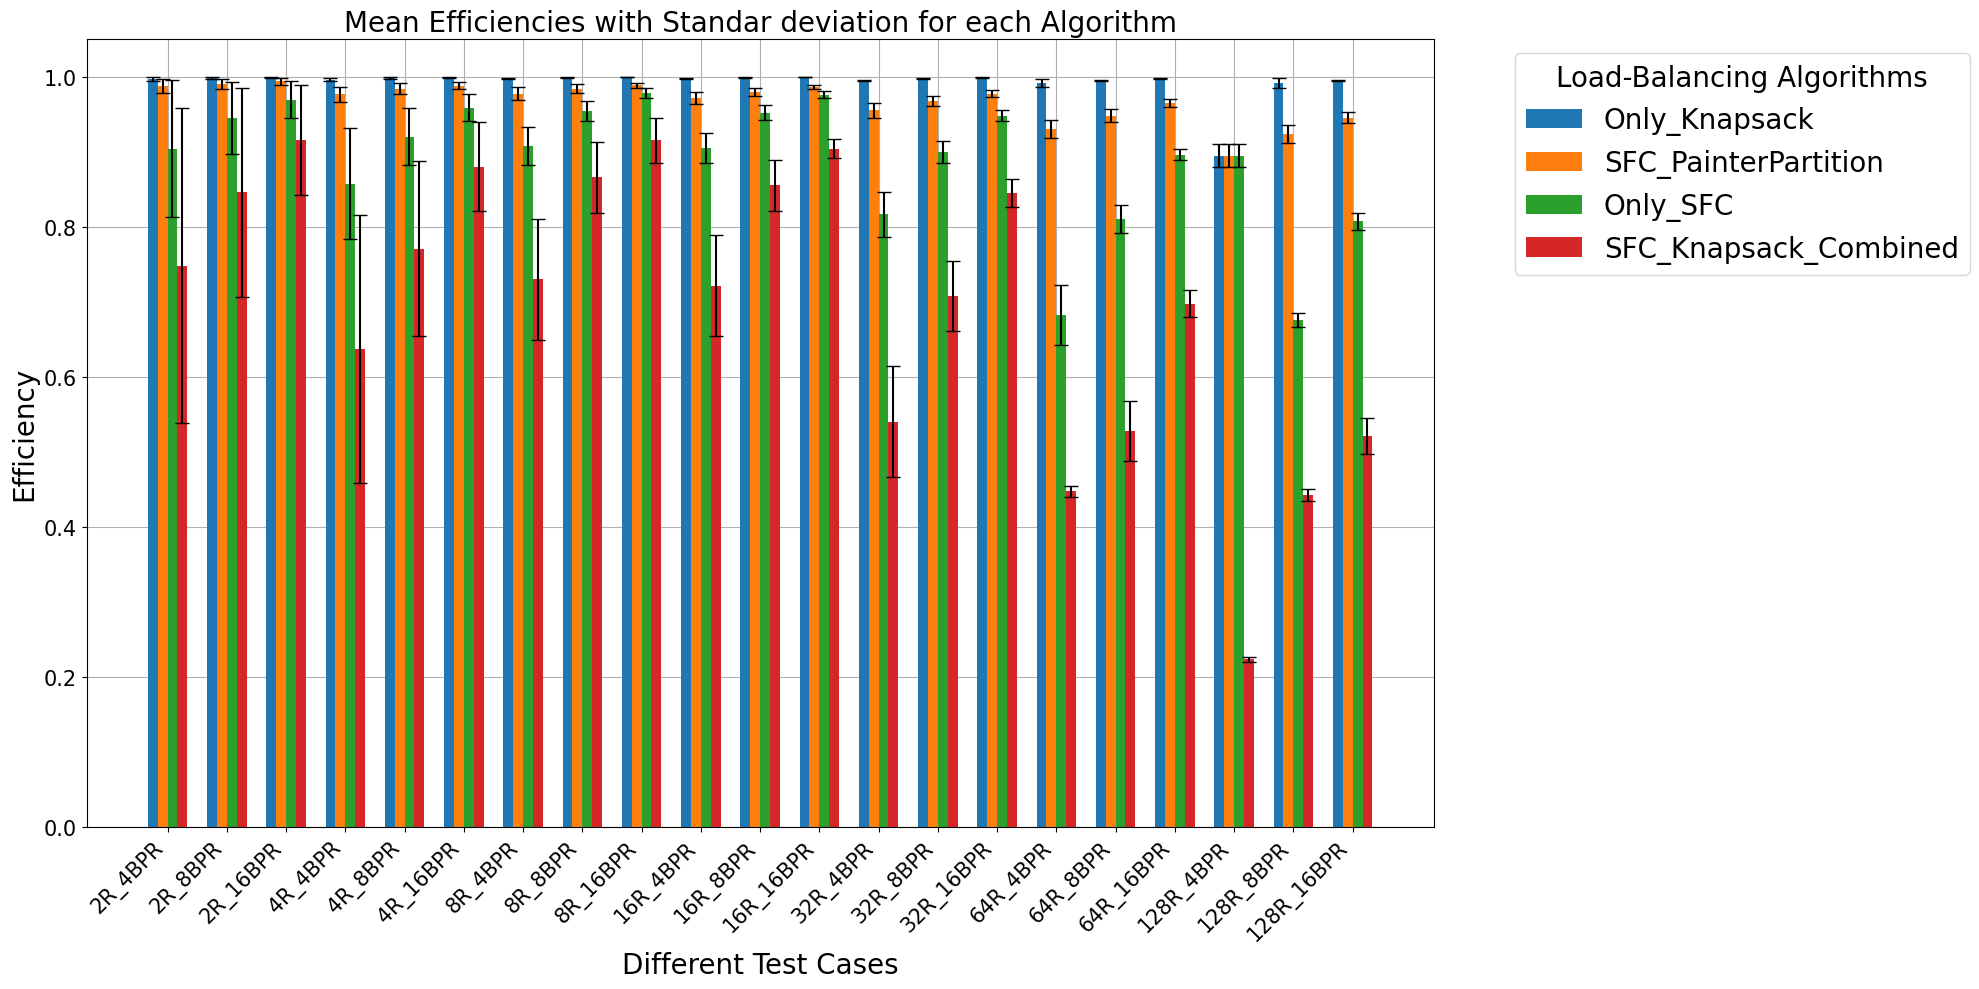

In [25]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standar deviation for each Algorithm', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
plt.savefig('./result/result_avg/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

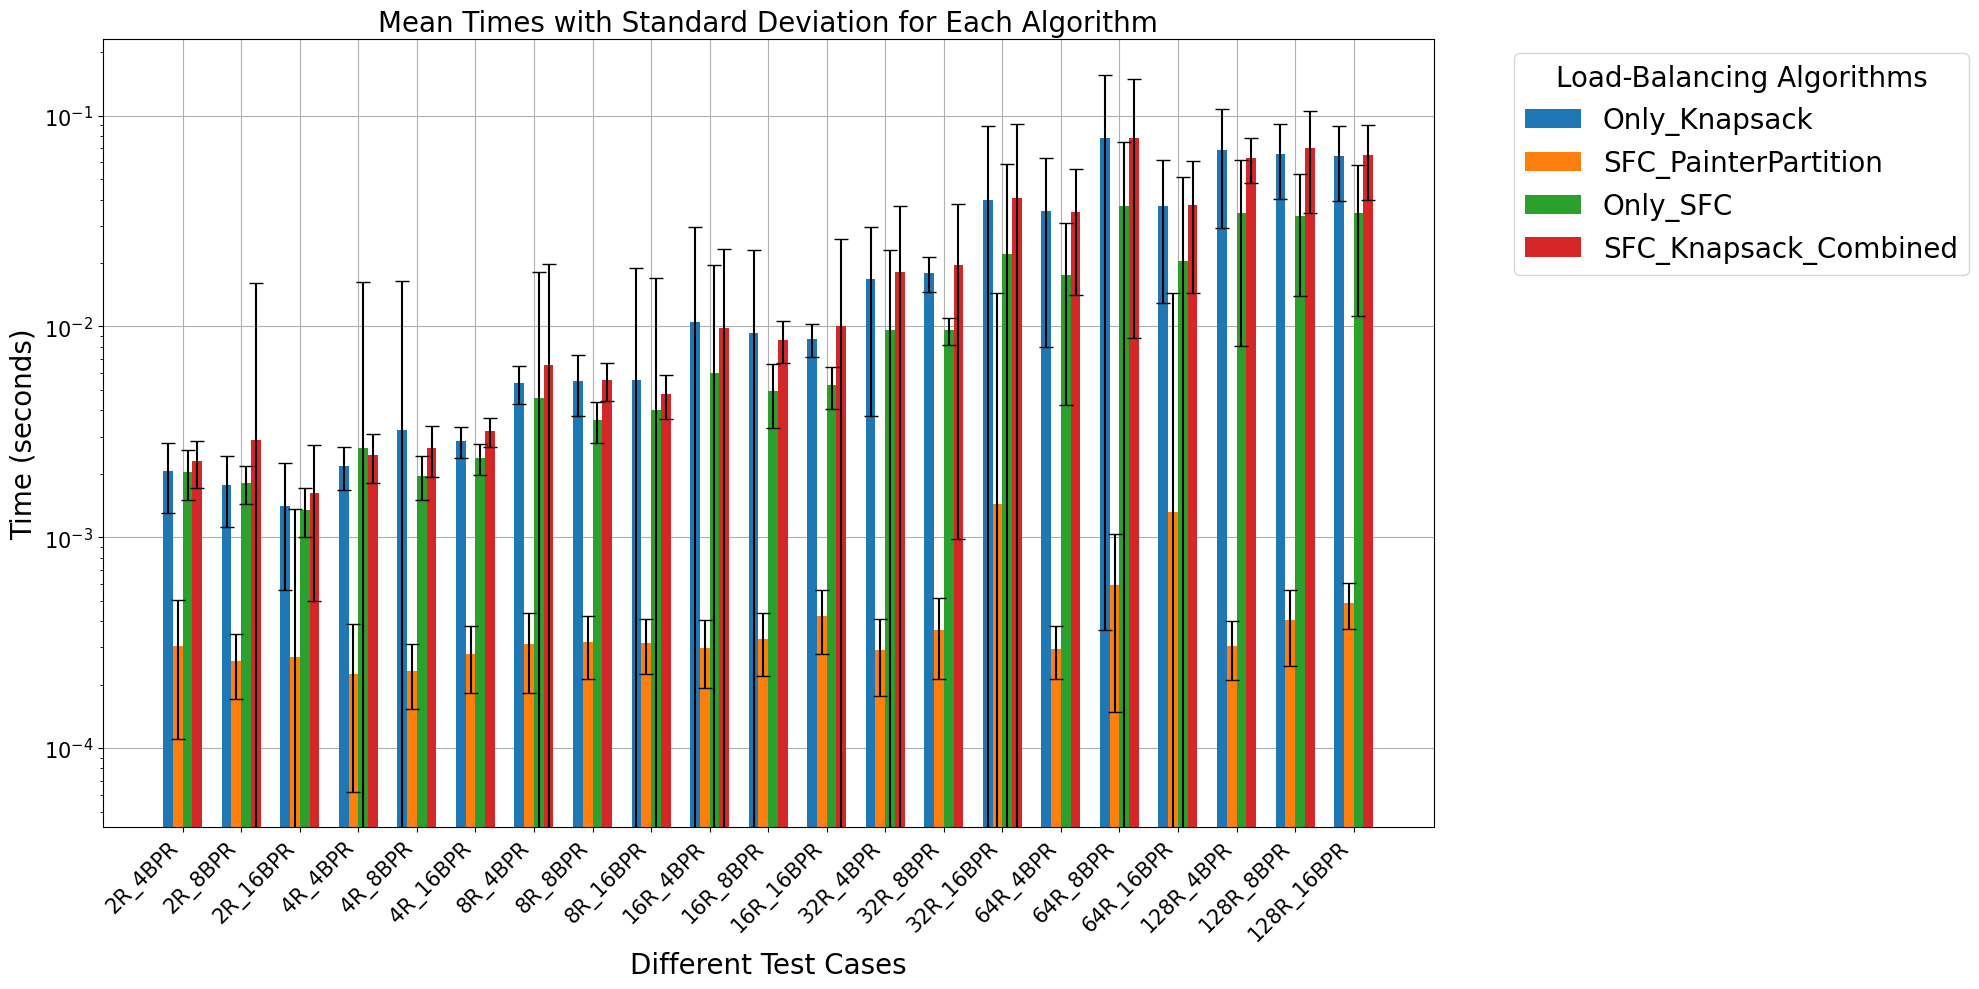

In [26]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
plt.savefig('./result/result_avg/time_errorbarplot.png', dpi=600)
plt.show()

In [27]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']

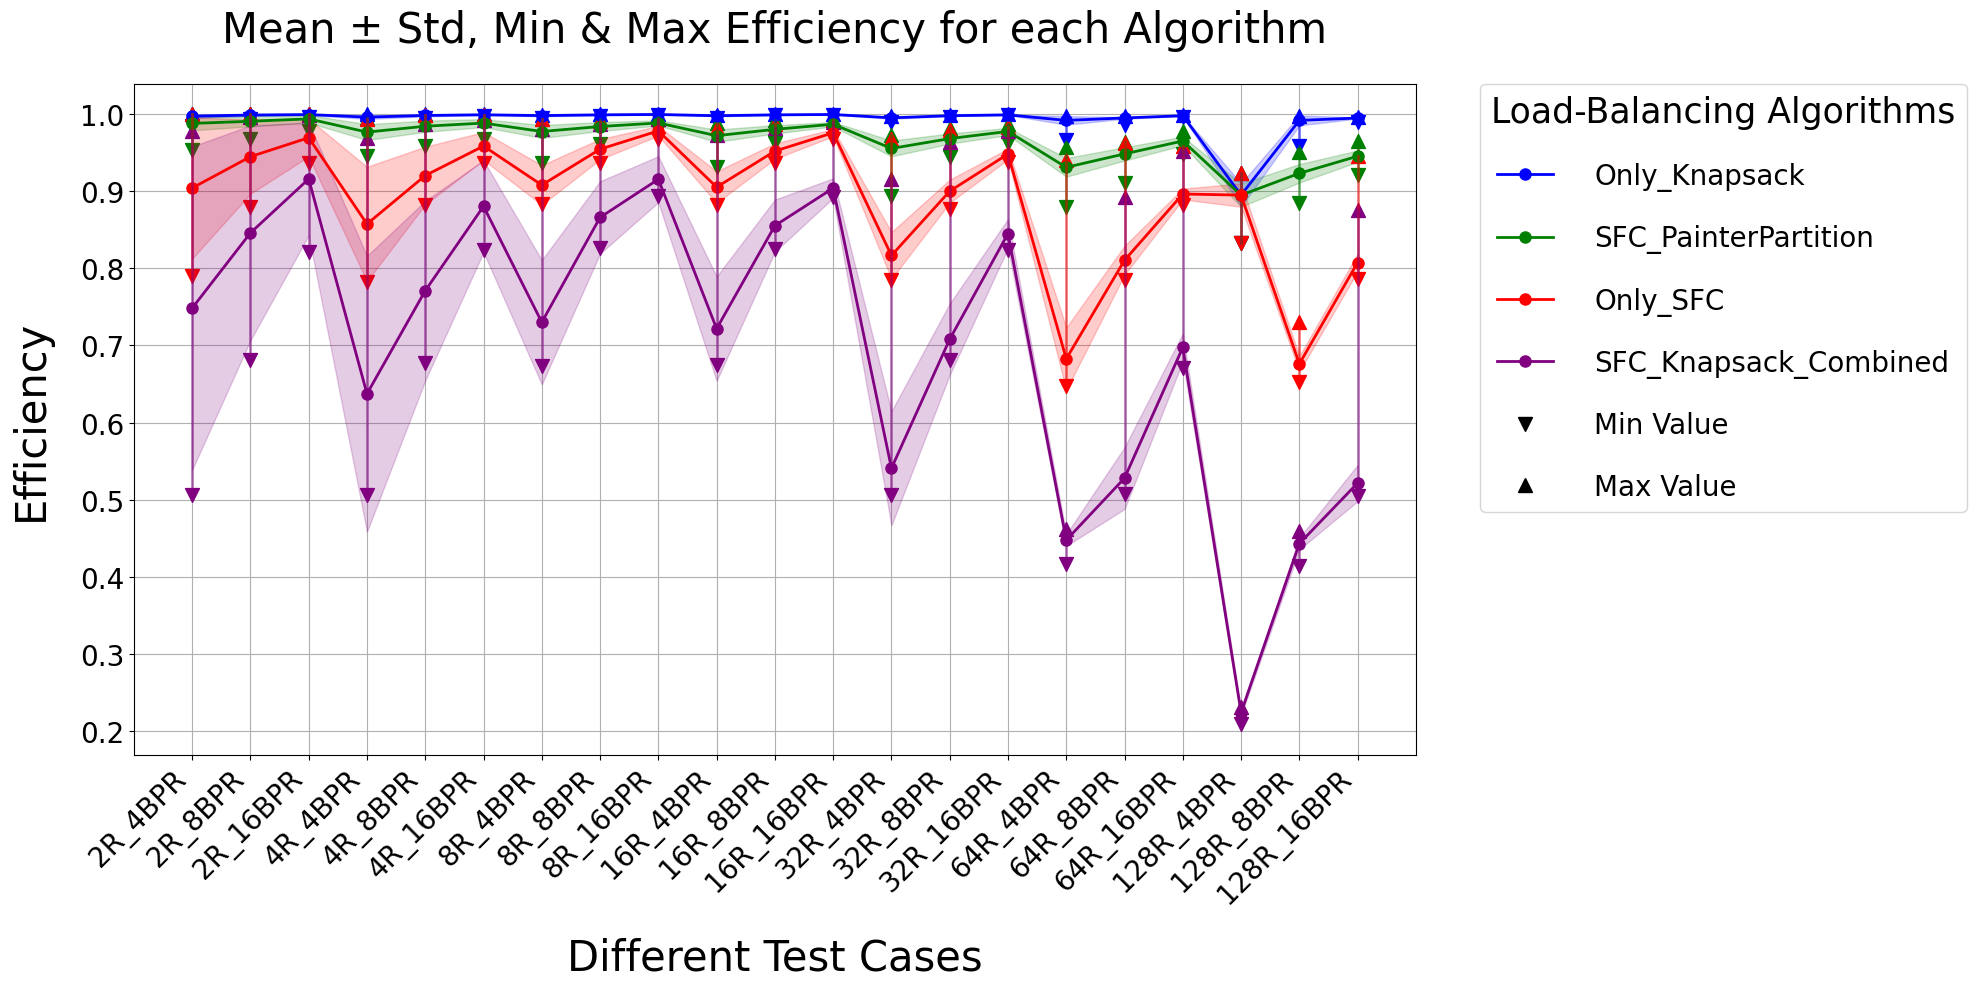

In [28]:


algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/result_avg/efficiency_all_stats.png', dpi=600)
plt.show()





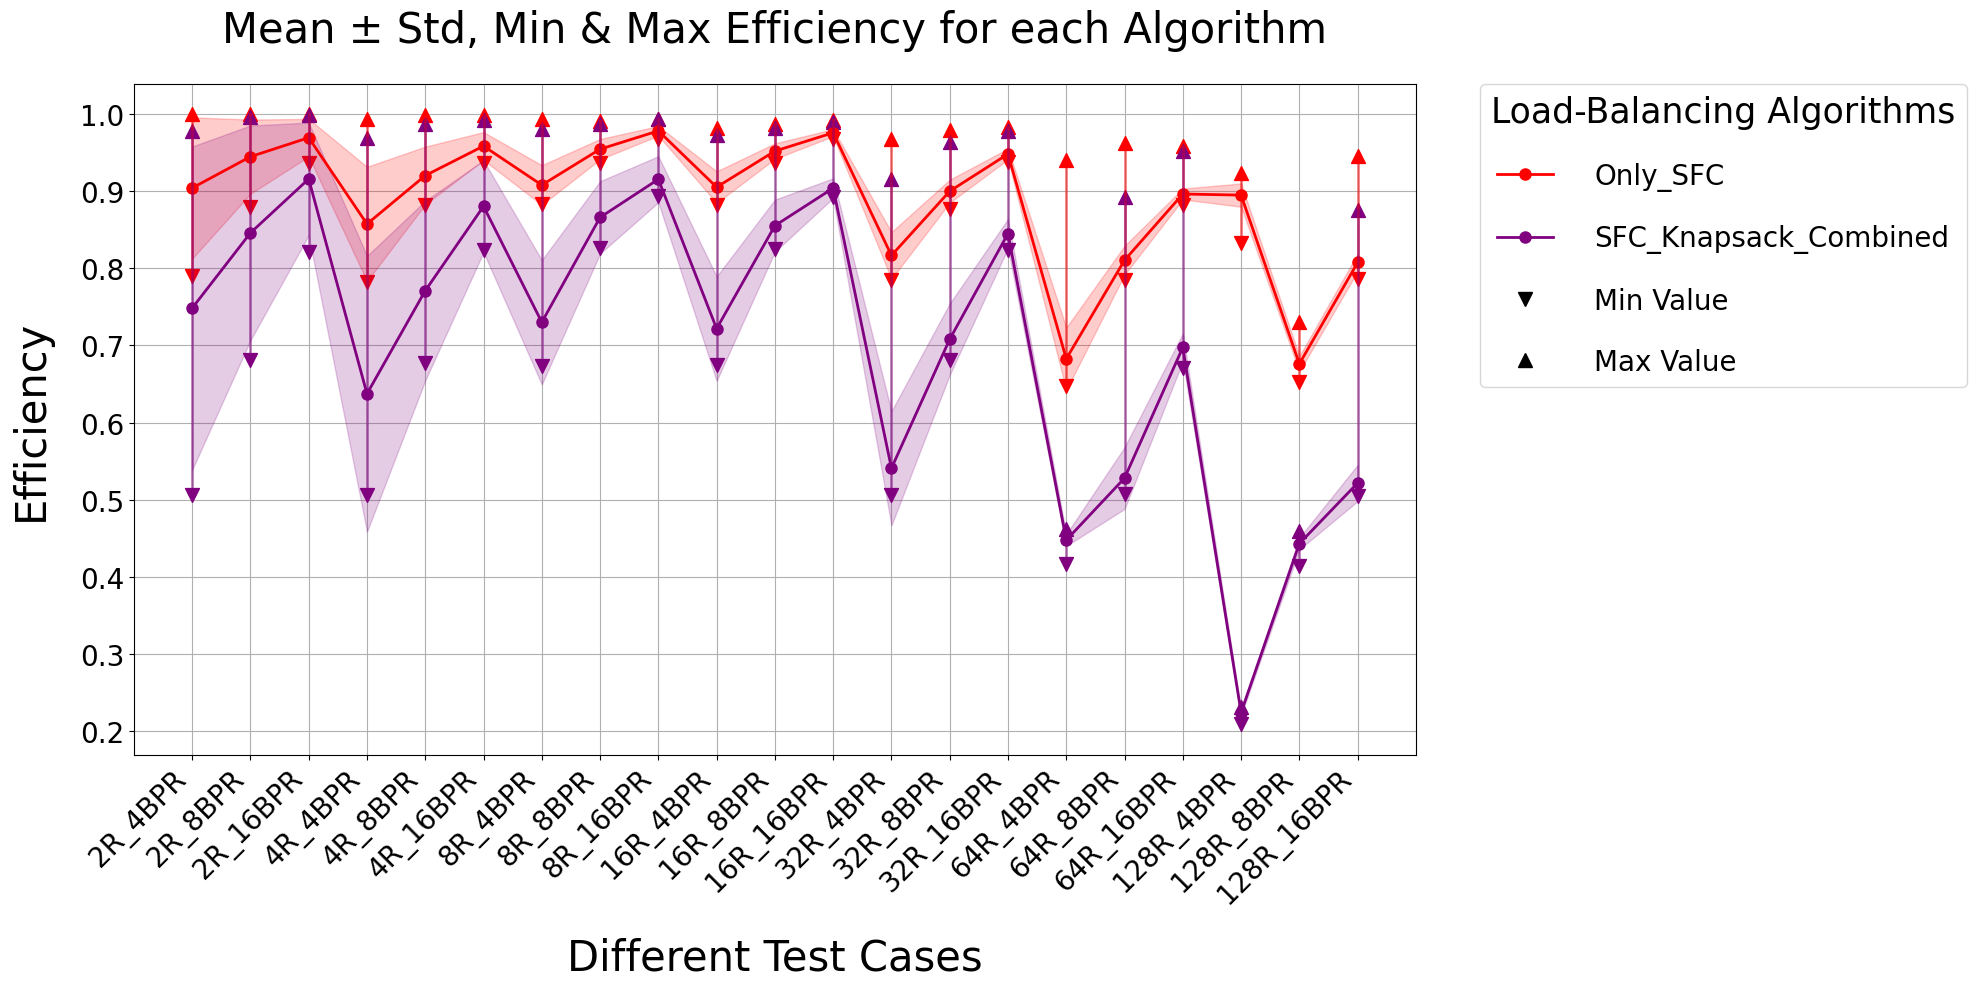

In [29]:


algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/result_avg/efficiency_all_stats_2.png', dpi=600)
plt.show()



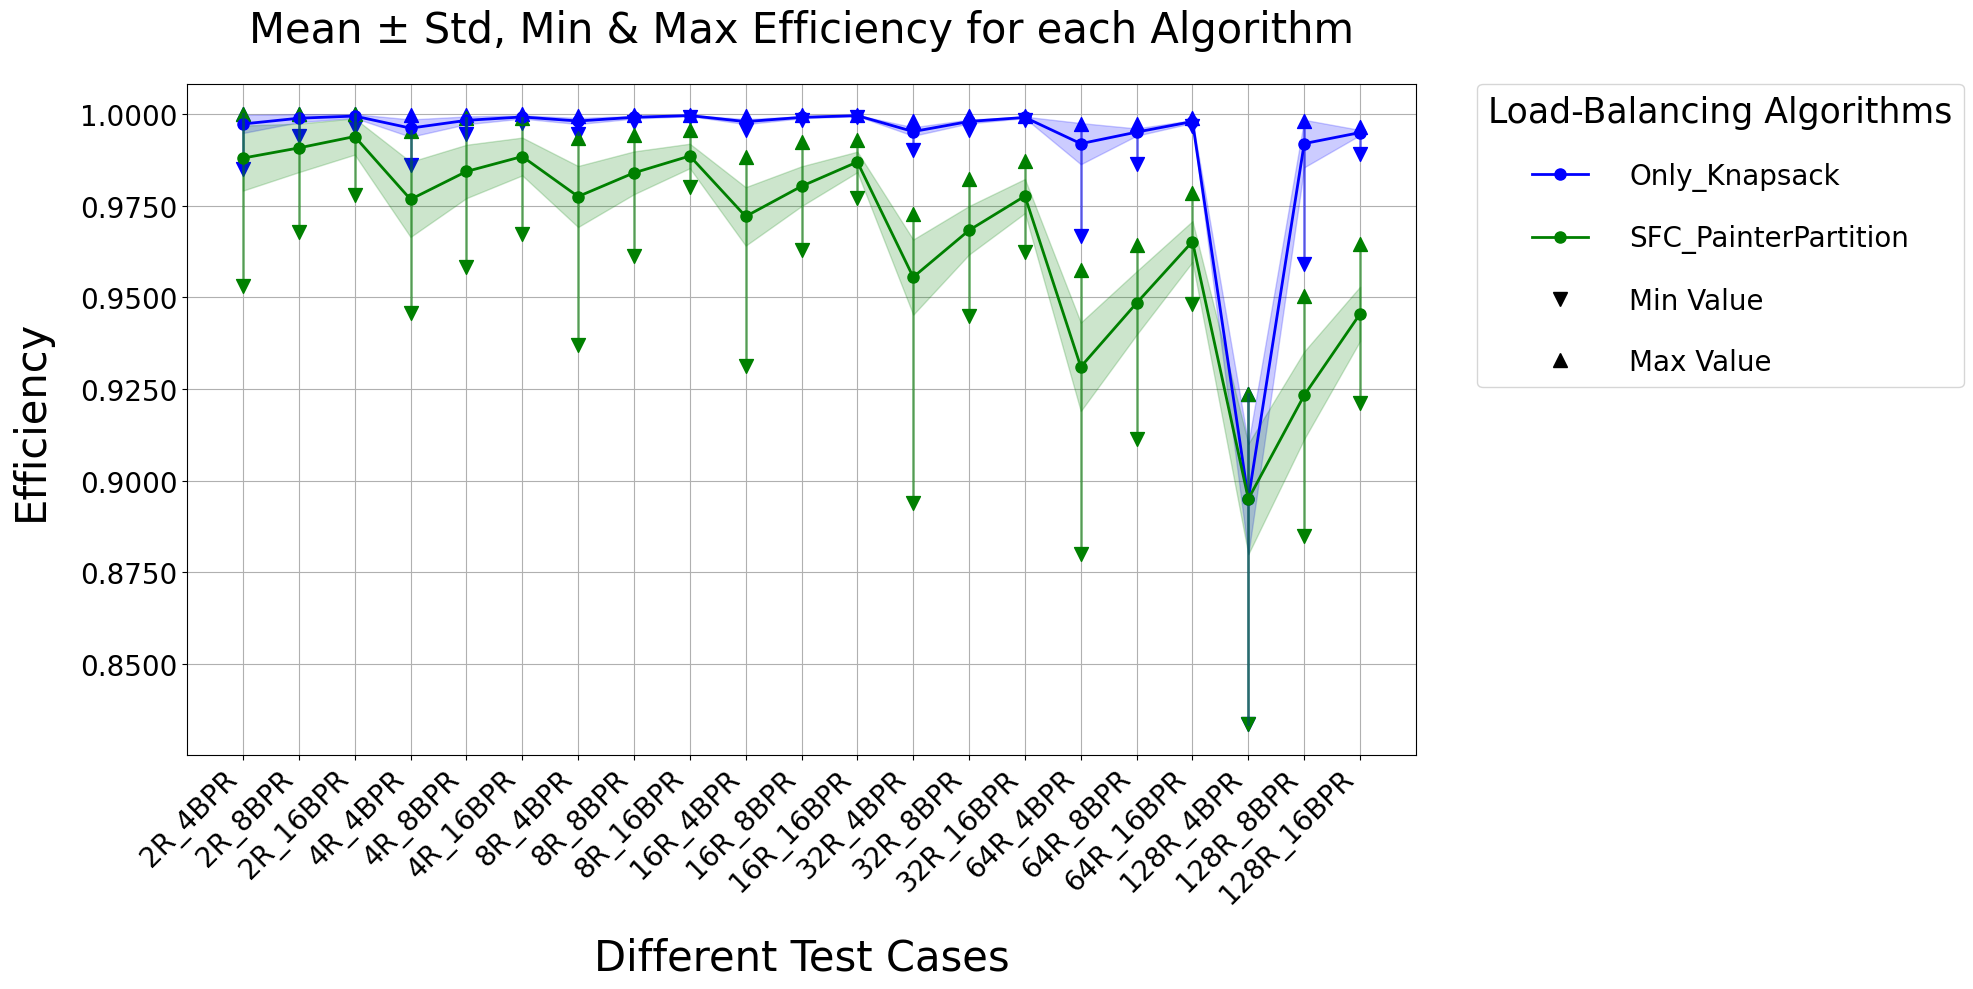

In [30]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition']
colors = ['blue', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/result_avg/efficiency_all_stats_3.png', dpi=600)
plt.show()


In [31]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.997331,0.002458,0.985014,0.999981,0.988021,0.008873,0.953137,0.999947,0.904235,0.091629,0.790568,0.999856,0.748395,0.209692,0.506579,0.977839,0.002057,0.000754,0.001256,0.008091,0.000306,0.000196,0.000176,0.002882,0.002049,0.000543,0.001219,0.005597,0.002291,0.000587,0.001466,0.007526
1,2R_8BPR,0.998904,0.001094,0.993990,0.999988,0.990800,0.006618,0.967822,0.999998,0.944897,0.048131,0.880138,0.999998,0.845986,0.139292,0.680693,0.996394,0.001779,0.000658,0.001144,0.010679,0.000259,0.000088,0.000159,0.000755,0.001806,0.000366,0.001141,0.003666,0.002890,0.013237,0.001266,0.211124
2,2R_16BPR,0.999488,0.000515,0.996405,0.999996,0.993911,0.004949,0.977912,0.999997,0.969501,0.024388,0.937070,0.999868,0.916004,0.073104,0.821028,0.998455,0.001412,0.000849,0.001068,0.012169,0.000272,0.001088,0.000150,0.017372,0.001351,0.000353,0.001055,0.003450,0.001615,0.001117,0.001210,0.017820
3,4R_4BPR,0.996196,0.002378,0.986188,0.999667,0.976759,0.010257,0.945838,0.995445,0.857560,0.074217,0.782717,0.994233,0.637295,0.178867,0.506610,0.968778,0.002180,0.000496,0.001719,0.006567,0.000224,0.000162,0.000154,0.002008,0.002646,0.013640,0.001398,0.217403,0.002444,0.000644,0.001882,0.010204
4,4R_8BPR,0.998323,0.001056,0.994658,0.999847,0.984370,0.007285,0.958336,0.999069,0.920378,0.037491,0.881995,0.999069,0.771026,0.116461,0.676905,0.987763,0.003244,0.013203,0.001669,0.210970,0.000233,0.000080,0.000155,0.000722,0.001963,0.000455,0.001341,0.004469,0.002649,0.000721,0.001841,0.008327
5,4R_16BPR,0.999247,0.000446,0.997695,0.999935,0.988457,0.005162,0.967317,0.998863,0.958671,0.018093,0.937293,0.998863,0.880547,0.059438,0.823278,0.992759,0.002860,0.000486,0.001860,0.005899,0.000281,0.000098,0.000178,0.000803,0.002371,0.000401,0.001556,0.003324,0.003183,0.000499,0.002033,0.005750
6,8R_4BPR,0.998136,0.000827,0.994697,0.999586,0.977538,0.008328,0.936986,0.993372,0.908078,0.025718,0.883123,0.993372,0.730126,0.080575,0.673124,0.980897,0.005414,0.001115,0.003094,0.013410,0.000311,0.000128,0.000172,0.001249,0.004567,0.013509,0.002172,0.216795,0.006560,0.013180,0.003296,0.212972
7,8R_8BPR,0.999159,0.000362,0.997977,0.999854,0.983998,0.005846,0.961278,0.994249,0.954629,0.013195,0.936153,0.991026,0.866110,0.046892,0.826327,0.987545,0.005526,0.001772,0.003122,0.022180,0.000317,0.000104,0.000189,0.000836,0.003607,0.000792,0.002183,0.009084,0.005597,0.001151,0.003282,0.013445
8,8R_16BPR,0.999625,0.000151,0.999153,0.999908,0.988599,0.003344,0.980086,0.995788,0.978348,0.006291,0.967296,0.994218,0.915585,0.029864,0.894233,0.993374,0.005561,0.013313,0.003034,0.214479,0.000317,0.000093,0.000213,0.000992,0.004011,0.012991,0.002037,0.208284,0.004780,0.001135,0.003163,0.015232
9,16R_4BPR,0.997973,0.000685,0.995658,0.999564,0.972110,0.007978,0.931401,0.988297,0.905350,0.020489,0.881998,0.982627,0.721788,0.067656,0.674037,0.972828,0.010550,0.019066,0.005545,0.221464,0.000300,0.000108,0.000187,0.001114,0.006047,0.013510,0.003412,0.218188,0.009885,0.013488,0.005815,0.2

/tmp/ipykernel_499004/1432636292.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(1e-6, 0)


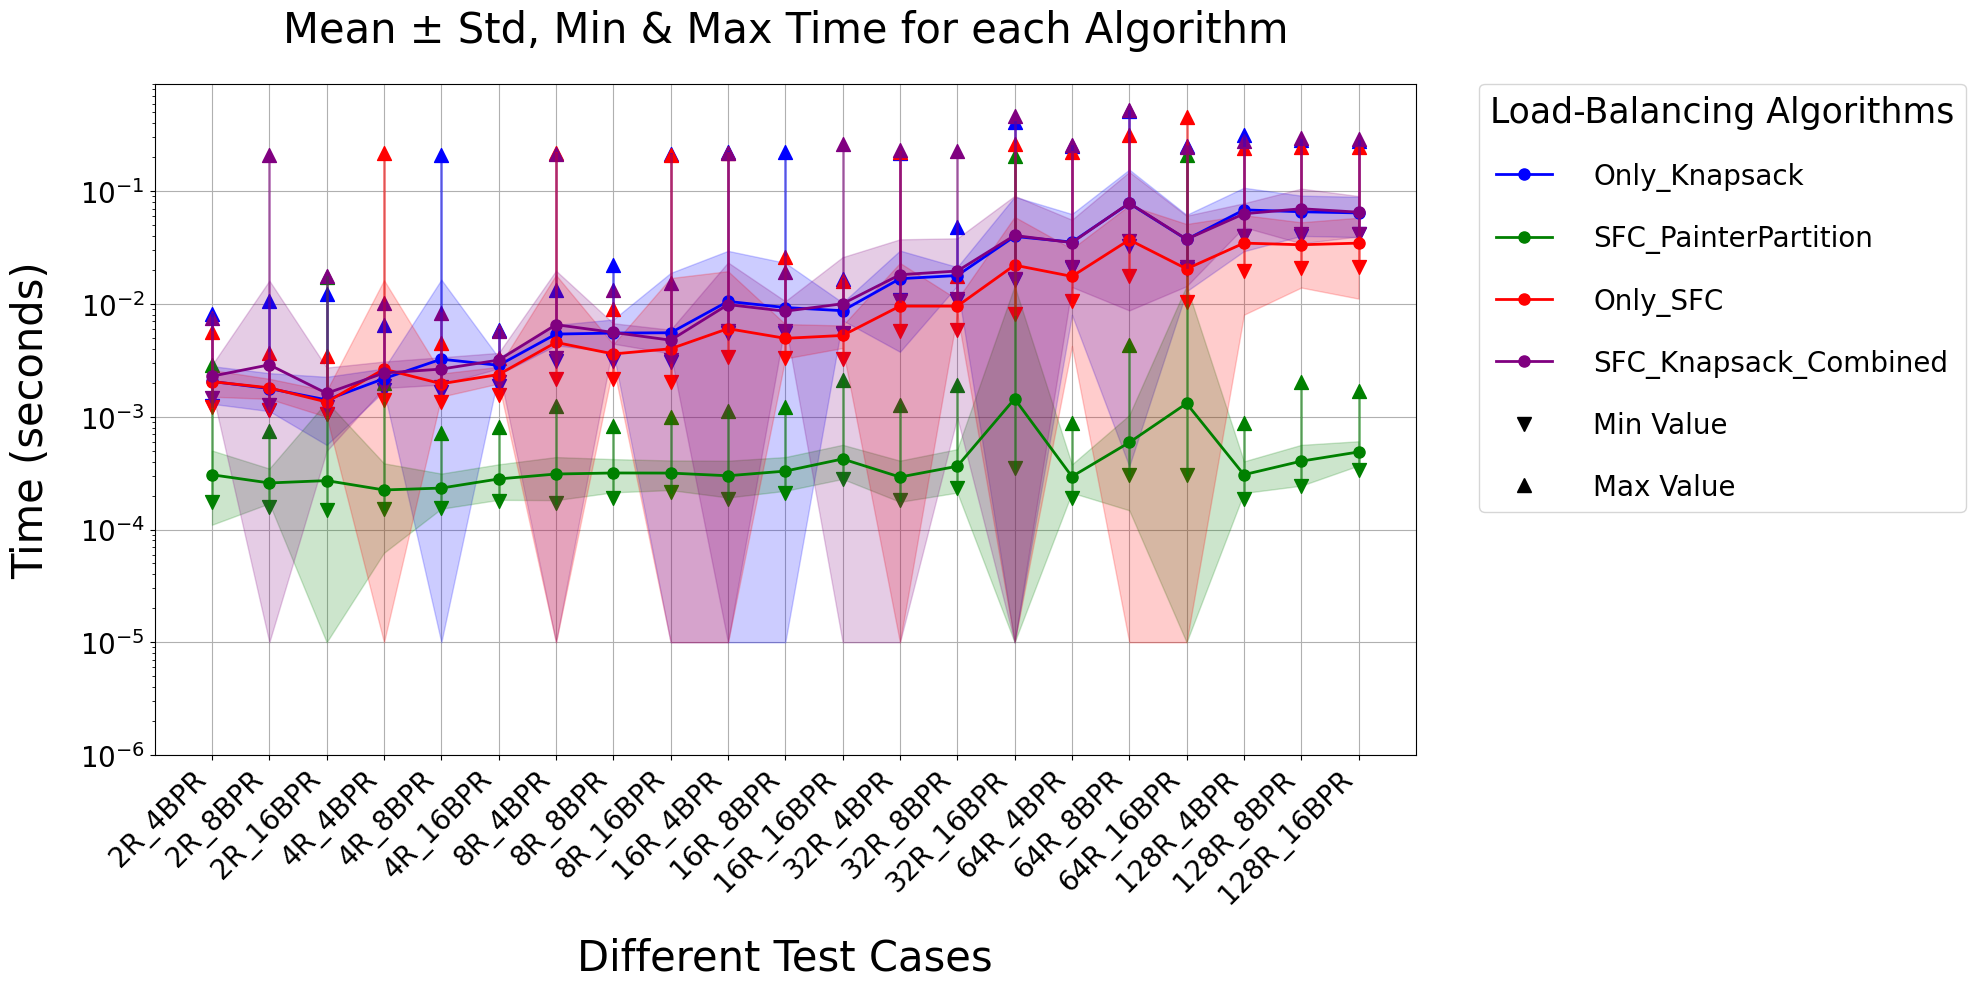

In [35]:



time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(time):
    alg_name = alg  

    mean_col = f'{alg_name}_Final_Time_mean'
    std_col = f'{alg_name}_Final_Time_std'
    min_col = f'{alg_name}_Final_Time_min'
    max_col = f'{alg_name}_Final_Time_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
    upper_bound = grouped[mean_col] + grouped[std_col]

    ax.fill_between(
        x,
        lower_bound,
        upper_bound,
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Time for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_yscale('log')
ax.set_ylim(1e-6, 0)  

min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/result_avg/time_all_stats.png', dpi=600)
plt.show()




/tmp/ipykernel_499004/779812361.py:35: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(1e-5, 0)


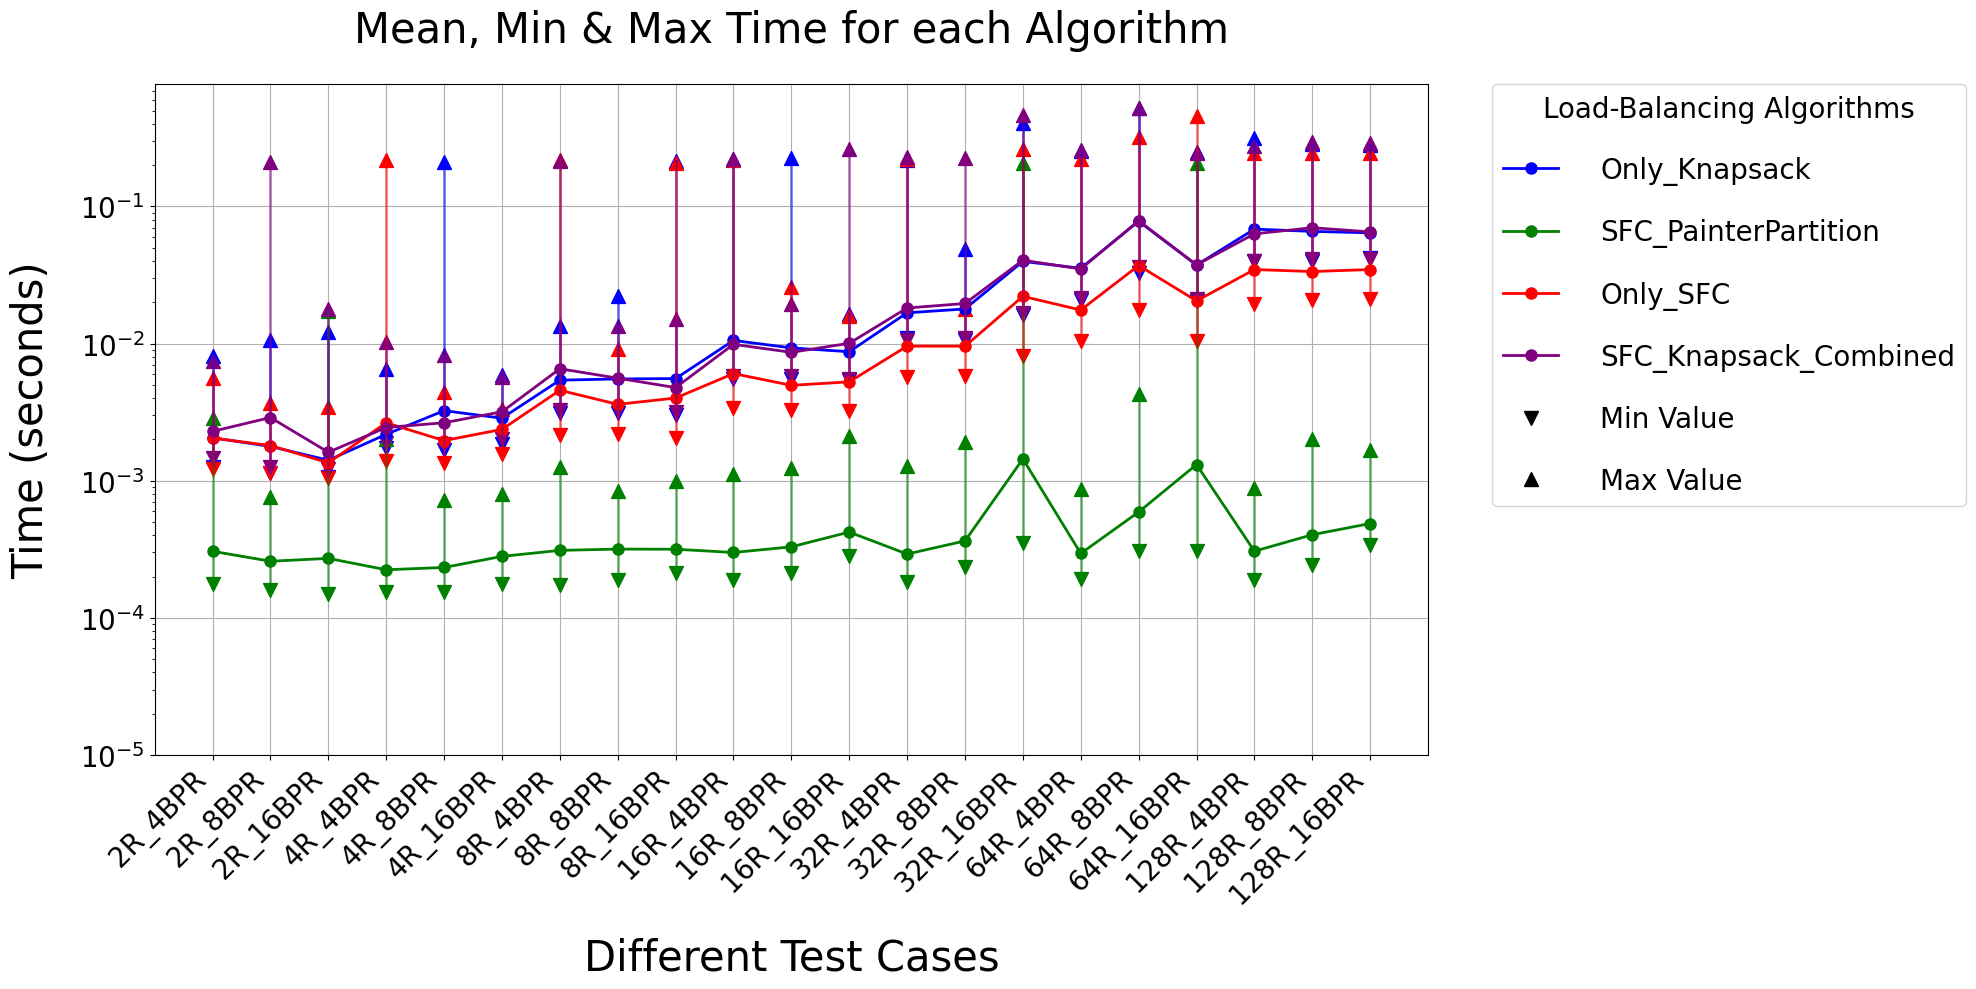

In [36]:
time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(time):
    alg_name = alg  

    mean_col = f'{alg_name}_Final_Time_mean'
    min_col = f'{alg_name}_Final_Time_min'
    max_col = f'{alg_name}_Final_Time_max'

    alg_color = colors[i]

    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]

        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
ax.set_title('Mean, Min & Max Time for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_yscale('log')
ax.set_ylim(1e-5, 0)  


min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/result_avg/time_all_stats_2.png', dpi=600)
plt.show()




In [37]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.997331,0.002458,0.985014,0.999981,0.988021,0.008873,0.953137,0.999947,0.904235,0.091629,0.790568,0.999856,0.748395,0.209692,0.506579,0.977839,0.002057,0.000754,0.001256,0.008091,0.000306,0.000196,0.000176,0.002882,0.002049,0.000543,0.001219,0.005597,0.002291,0.000587,0.001466,0.007526
1,2R_8BPR,0.998904,0.001094,0.993990,0.999988,0.990800,0.006618,0.967822,0.999998,0.944897,0.048131,0.880138,0.999998,0.845986,0.139292,0.680693,0.996394,0.001779,0.000658,0.001144,0.010679,0.000259,0.000088,0.000159,0.000755,0.001806,0.000366,0.001141,0.003666,0.002890,0.013237,0.001266,0.211124
2,2R_16BPR,0.999488,0.000515,0.996405,0.999996,0.993911,0.004949,0.977912,0.999997,0.969501,0.024388,0.937070,0.999868,0.916004,0.073104,0.821028,0.998455,0.001412,0.000849,0.001068,0.012169,0.000272,0.001088,0.000150,0.017372,0.001351,0.000353,0.001055,0.003450,0.001615,0.001117,0.001210,0.017820
3,4R_4BPR,0.996196,0.002378,0.986188,0.999667,0.976759,0.010257,0.945838,0.995445,0.857560,0.074217,0.782717,0.994233,0.637295,0.178867,0.506610,0.968778,0.002180,0.000496,0.001719,0.006567,0.000224,0.000162,0.000154,0.002008,0.002646,0.013640,0.001398,0.217403,0.002444,0.000644,0.001882,0.010204
4,4R_8BPR,0.998323,0.001056,0.994658,0.999847,0.984370,0.007285,0.958336,0.999069,0.920378,0.037491,0.881995,0.999069,0.771026,0.116461,0.676905,0.987763,0.003244,0.013203,0.001669,0.210970,0.000233,0.000080,0.000155,0.000722,0.001963,0.000455,0.001341,0.004469,0.002649,0.000721,0.001841,0.008327
5,4R_16BPR,0.999247,0.000446,0.997695,0.999935,0.988457,0.005162,0.967317,0.998863,0.958671,0.018093,0.937293,0.998863,0.880547,0.059438,0.823278,0.992759,0.002860,0.000486,0.001860,0.005899,0.000281,0.000098,0.000178,0.000803,0.002371,0.000401,0.001556,0.003324,0.003183,0.000499,0.002033,0.005750
6,8R_4BPR,0.998136,0.000827,0.994697,0.999586,0.977538,0.008328,0.936986,0.993372,0.908078,0.025718,0.883123,0.993372,0.730126,0.080575,0.673124,0.980897,0.005414,0.001115,0.003094,0.013410,0.000311,0.000128,0.000172,0.001249,0.004567,0.013509,0.002172,0.216795,0.006560,0.013180,0.003296,0.212972
7,8R_8BPR,0.999159,0.000362,0.997977,0.999854,0.983998,0.005846,0.961278,0.994249,0.954629,0.013195,0.936153,0.991026,0.866110,0.046892,0.826327,0.987545,0.005526,0.001772,0.003122,0.022180,0.000317,0.000104,0.000189,0.000836,0.003607,0.000792,0.002183,0.009084,0.005597,0.001151,0.003282,0.013445
8,8R_16BPR,0.999625,0.000151,0.999153,0.999908,0.988599,0.003344,0.980086,0.995788,0.978348,0.006291,0.967296,0.994218,0.915585,0.029864,0.894233,0.993374,0.005561,0.013313,0.003034,0.214479,0.000317,0.000093,0.000213,0.000992,0.004011,0.012991,0.002037,0.208284,0.004780,0.001135,0.003163,0.015232
9,16R_4BPR,0.997973,0.000685,0.995658,0.999564,0.972110,0.007978,0.931401,0.988297,0.905350,0.020489,0.881998,0.982627,0.721788,0.067656,0.674037,0.972828,0.010550,0.019066,0.005545,0.221464,0.000300,0.000108,0.000187,0.001114,0.006047,0.013510,0.003412,0.218188,0.009885,0.013488,0.005815,0.2

In [38]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean' ]
new_df = grouped[columns_to_keep]


In [39]:
new_df

,File,Only_Knapsack_Efficiency_mean,Only_SFC_Efficiency_mean,SFC_PainterPartition_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_mean,Only_Knapsack_Final_Time_mean,Only_SFC_Final_Time_mean,SFC_PainterPartition_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_mean
0,2R_4BPR,0.997331,0.904235,0.988021,0.748395,0.002057,0.002049,0.000306,0.002291
1,2R_8BPR,0.998904,0.944897,0.990800,0.845986,0.001779,0.001806,0.000259,0.002890
2,2R_16BPR,0.999488,0.969501,0.993911,0.916004,0.001412,0.001351,0.000272,0.001615
3,4R_4BPR,0.996196,0.857560,0.976759,0.637295,0.002180,0.002646,0.000224,0.002444
4,4R_8BPR,0.998323,0.920378,0.984370,0.771026,0.003244,0.001963,0.000233,0.002649
5,4R_16BPR,0.999247,0.958671,0.988457,0.880547,0.002860,0.002371,0.000281,0.003183
6,8R_4BPR,0.998136,0.908078,0.977538,0.730126,0.005414,0.004567,0.000311,0.006560
7,8R_8BPR,0.999159,0.954629,0.983998,0.866110,0.005526,0.003607,0.000317,0.005597
8,8R_16BPR,0.999625,0.978348,0.988599,0.915585,0.005561,0.004011,0.000317,0.004780
9,16R_4BPR,0.997973,0.905350,0.972110,0.721788,0.010550,0.006047,0.000300,0.009885


In [40]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

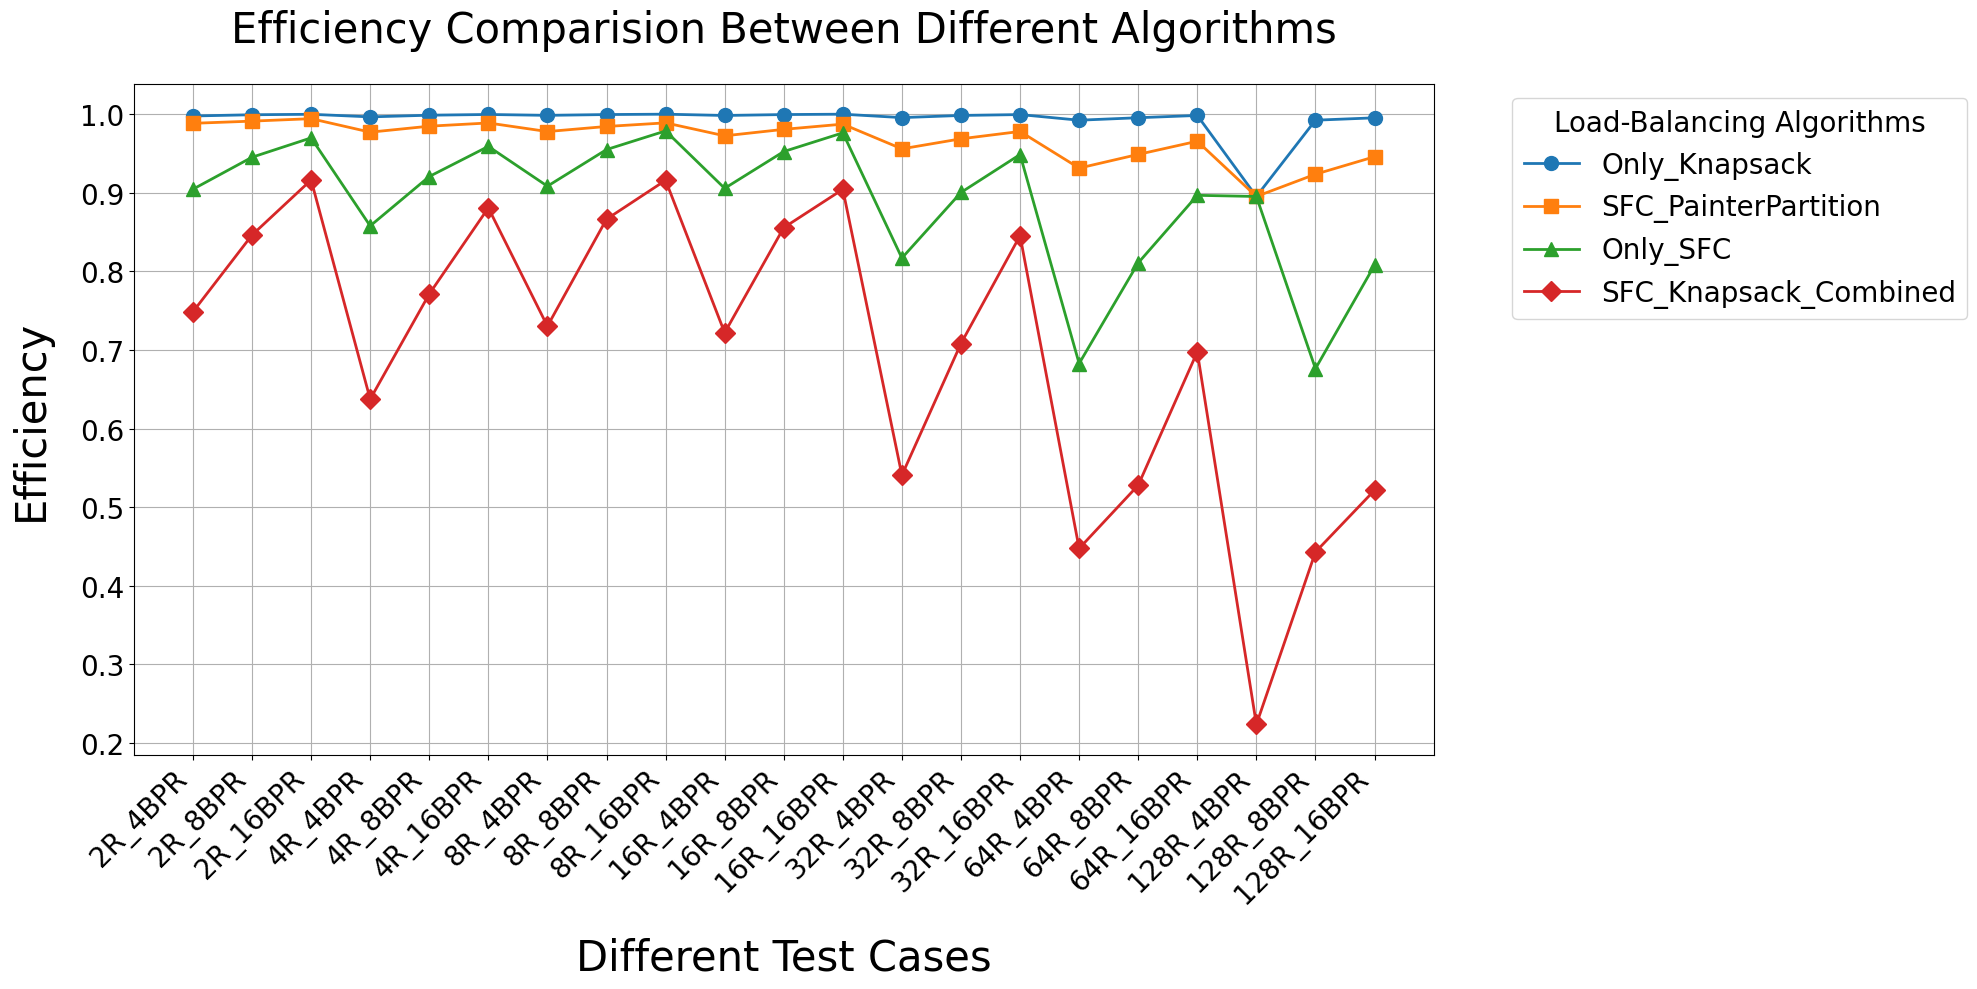

In [41]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/result_avg/efficiency.png', dpi=600)
plt.show()





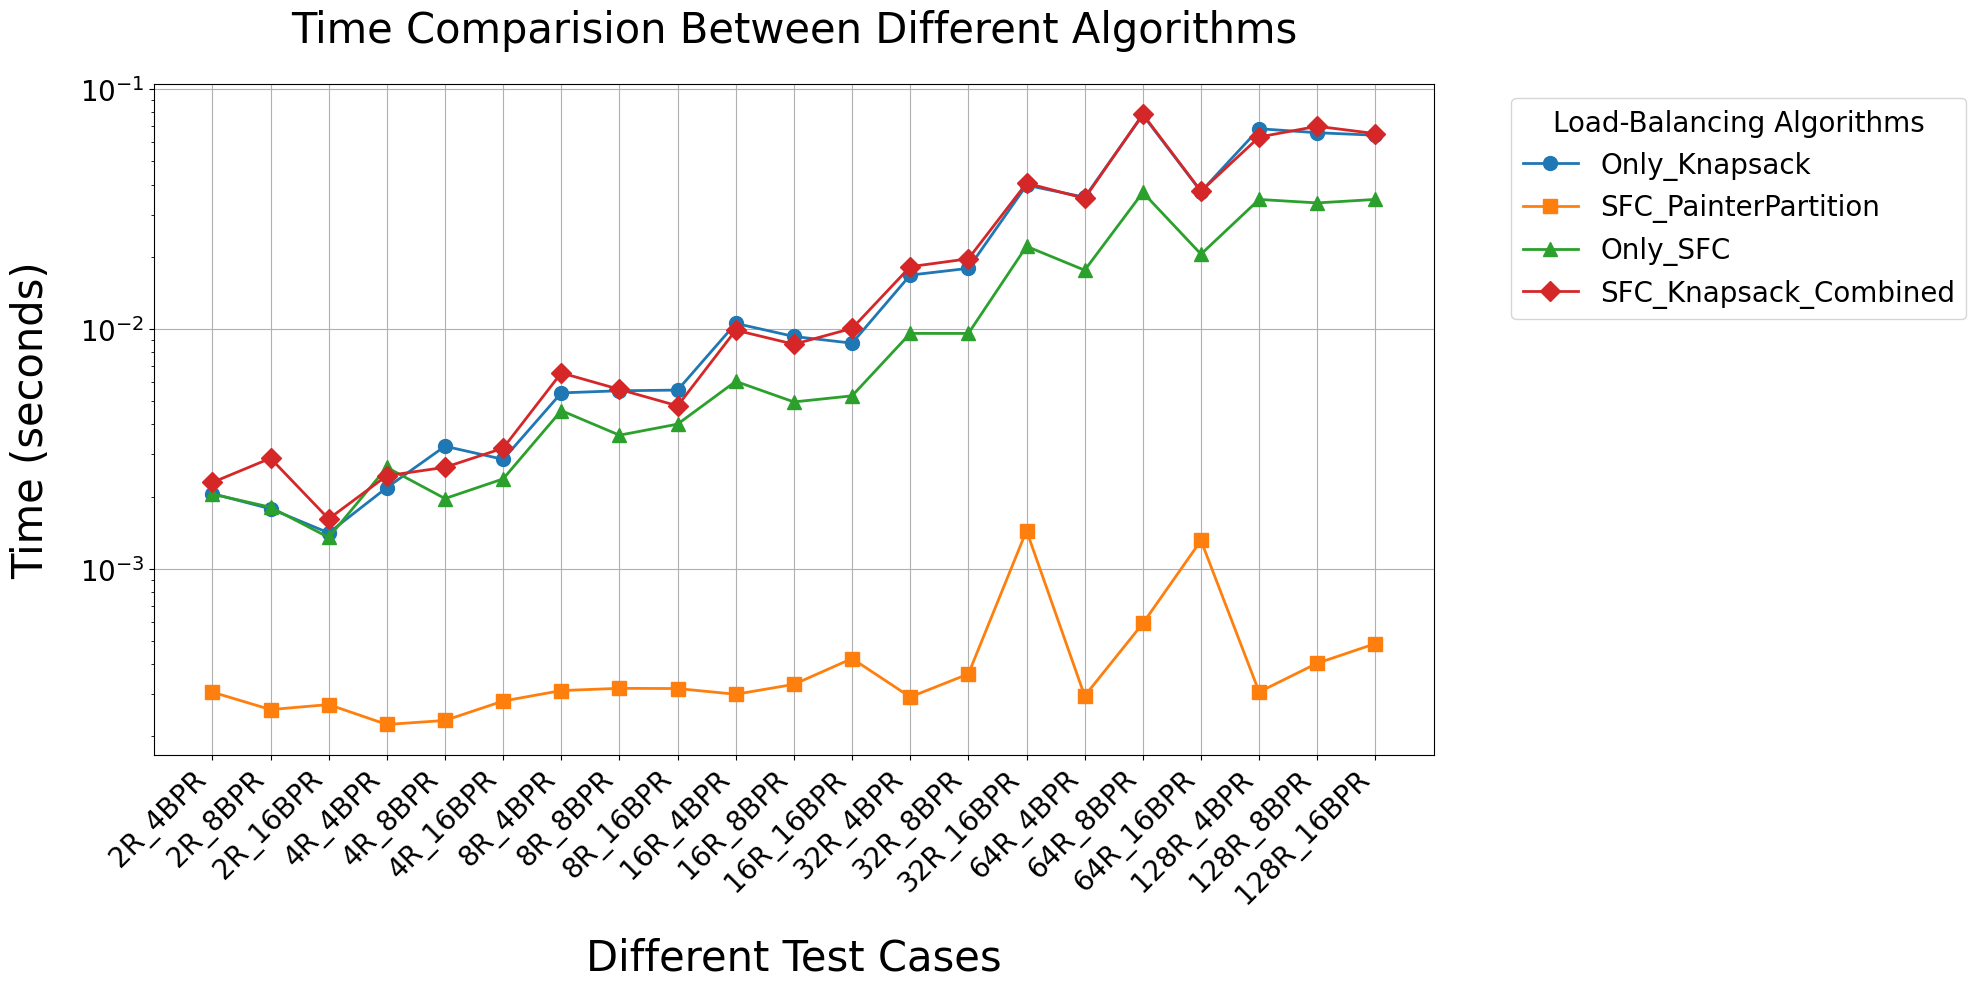

In [42]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Time Comparision Between Different Algorithms', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('./result/result_avg/time.png', dpi=600)
plt.show()


